<a href="https://colab.research.google.com/github/jakedesantis/Python/blob/master/JakesNeverWrongPriceForecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the needed libraries.

In [2]:
import fbprophet
print ("Prophet %s"% fbprophet.__version__)

import pandas as pd
print ("Pandas %s"% pd.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

!pip install yfinance
import yfinance as yf
print('yf %s' % yf.__version__)

from pandas.core.tools.datetimes import to_datetime
from fbprophet.forecaster import Prophet #was auto-inserted by colabs


Prophet 0.7.1
Pandas 1.1.5
yf 0.1.68


Input the instrument, and training period.

In [ ]:
t = 'TSLA'
s = '2015-01-01'
e = '2020-12-31'

[*********************100%***********************]  1 of 1 completed


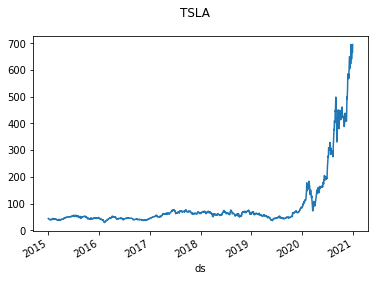

<Figure size 576x432 with 0 Axes>

In [9]:
TSLAraw = yf.download(t, start=s, end=e, auto_adjust=True)
TSLA = TSLAraw.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

TSLA['i'] = range (0, TSLA.shape[0])
TSLA.reset_index(inplace=True)
TSLA = TSLA.set_index('i')
TSLA.columns=(['ds','y'])
TSLA.ds = pd.to_datetime(TSLA.ds)
TSLA.index.name = None

TSLA.plot(x='ds', y='y', legend=None)
plt.suptitle(t)
plt.show()

Here's where the magic happens!

In [14]:
model = Prophet()
model.fit(TSLA)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Over what time horizon do you want to get rich?

In [15]:
future = list()
for i in range(1,13):
  date = '2021-%02d' % i
  future.append([date])
future = pd.DataFrame(future)

future.columns = (['ds'])
future['ds'] = pd.to_datetime(future['ds'])


And the answer is...

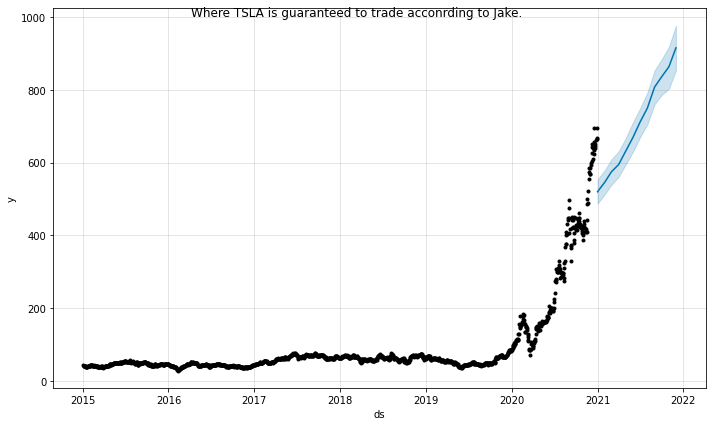

In [19]:
forecast = model.predict(future)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
model.plot(forecast)
plt.suptitle('Where %s is guaranteed to trade acconrding to Jake.' % t)
plt.show()
